## Coffee Shop Prediction

- This project is to practice techniques of Linear Regression learnt before.
- The main point is to create a prediction model with an accuracy of over 75% (Minimum of 75%, higher is better)
- The project will help understand the relationship between customer behavior, operational decisions, and revenue generation in the food and beverage industry.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
import warnings
warnings.simplefilter("ignore")

### Importing Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Nigel K. Rodrigues\Desktop\Misc\Practice Projects\Dataset\coffee_shop_revenue.csv")

columns = df.columns

### Exploratory Data Analysis

In [4]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [5]:
df.sample(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
1388,249,8.71,9,5,263.39,705,2641.09
424,144,3.22,10,13,294.09,718,917.59
1512,68,5.62,8,7,334.33,198,889.45
1546,296,5.53,15,4,324.37,704,2260.18
1501,489,2.86,17,2,63.91,168,1372.58


In [6]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [7]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


### Visualization

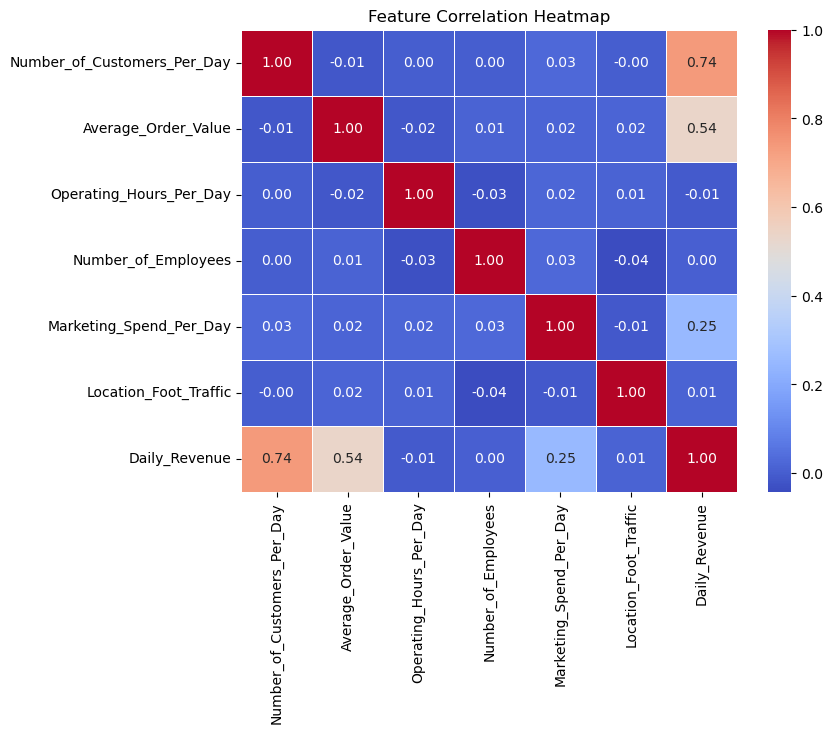

In [9]:
# Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

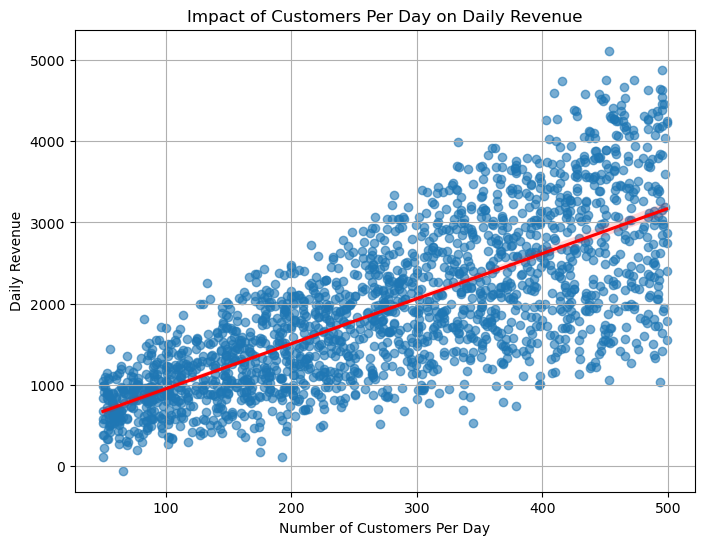

In [10]:
# Scatter plot with Regeression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Number_of_Customers_Per_Day"], y=df["Daily_Revenue"], scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.xlabel("Number of Customers Per Day")
plt.ylabel("Daily Revenue")
plt.title("Impact of Customers Per Day on Daily Revenue")
plt.grid(True)
plt.show()

  How does the number of customers per day impact daily revenue?
* The data shows a clear upward trend, meaning that as the number of customers per day increases, daily revenue also tends to rise.
* While this suggests a direct relation between foot traffic and earnings.
* The regression line is used to determine the strength of correlation between the 2 points (Daily Revenue, Number of Customers Per Day)
* In the above graph the points are spread out showing, having more customers each day does seems to help increase daily revenue, but not as much as you might expect. (Customers are visiting but not spending a lot)
* If the customers spend low, even with high flow of customers profit will not rise much.

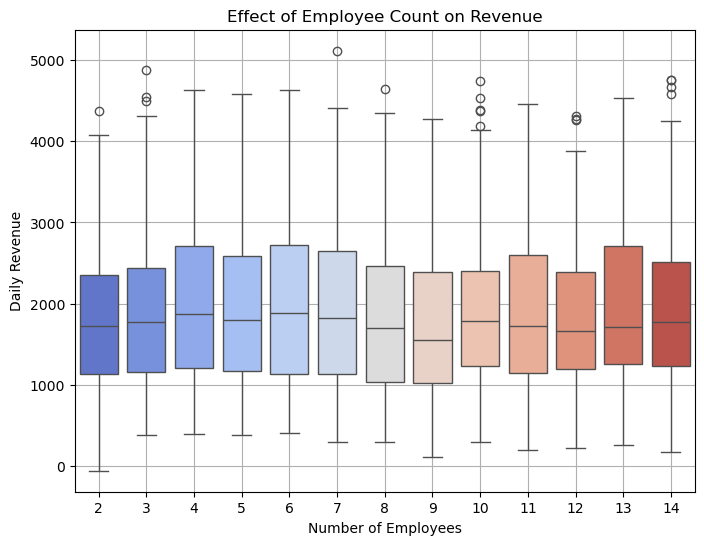

In [11]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Number_of_Employees"], y=df["Daily_Revenue"], palette="coolwarm")
plt.xlabel("Number of Employees")
plt.ylabel("Daily Revenue")
plt.title("Effect of Employee Count on Revenue")
plt.grid(True)
plt.show()

  Does having more employees lead to higher daily revenue?
* Boxplot is used to visualize the distribution of a dataset, highlighting key statistical measures such as median, quartiles, and possible outliers.
* Looking at the above graph we can see that the pattern doesn’t show a clear increase in revenue as more employees are added.
* Hence while having more staff might help with operations, it doesn’t guarantee higher earnings.

In [12]:
X = df[columns[:-1]]
y = df[columns[-1]]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                       Feature       VIF
0  Number_of_Customers_Per_Day  4.830651
1          Average_Order_Value  7.218452
2      Operating_Hours_Per_Day  8.505845
3          Number_of_Employees  4.785341
4      Marketing_Spend_Per_Day  3.932001
5        Location_Foot_Traffic  4.371809


### Splitting the Dataset

In [13]:
#Scaling the data.
scaler = StandardScaler()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=10)
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [14]:
# Tuning Techniques
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

In [15]:
# Model Training
lr.fit(train_X, train_y)
ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

Lasso(alpha=0.1)

In [16]:
# Sample Prediction 
pred_sales_lr = lr.predict(test_X)
pred_sales_ridge = ridge.predict(test_X)
pred_sales_lasso = lasso.predict(test_X)

In [17]:
# Evaluation Metrics
mae_lr = mean_absolute_error(pred_sales_lr, test_y)
rmse_lr = np.sqrt(mean_squared_error(test_y, pred_sales_lr))
r2_lr = r2_score(test_y, pred_sales_lr)


In [18]:
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R² Score: {r2_lr}")


Linear Regression - MAE: 252.59351178614716, RMSE: 325.5321308641178, R² Score: 0.8645224100288286


From the above we can see the following:  

Mean Absolute Error (MAE) → 252.59
- MAE represents the average absolute difference between the actual values (test_y) and the predicted values (pred_sales_lr).
- In this case, the model’s predictions are on average, ₹252.59 away from the actual daily revenue.

Root Mean Squared Error (RMSE) → 325.53
- RMSE is similar to MAE but penalizes larger errors more heavily by squaring them before averaging.
- A higher RMSE compared to MAE suggests some predictions have larger deviations from the actual revenue values.
-In this case, the model has an error of ₹325.53 on average.
- But squared errors mean extreme values have a stronger influence.
- An RMSE of 325.53 might indicate some outliers
- This would mean the model could be further optimized.


R² Score → 0.8645
- This metric measures how well the model explains variability in revenue.
- An R² score of 0.86 means 86.45% of the variance in daily revenue is explained by the input features (customer count, order value, operating hours, etc.).
- The closer to 1, the better the model fits the data.
- This high R² score indicates a strong predictive relationship between features and revenue



 

In [19]:
rand_rows = df.sample(n=2)

feats = rand_rows[['Number_of_Customers_Per_Day', 'Average_Order_Value', 
                   'Operating_Hours_Per_Day', 'Number_of_Employees', 
                   'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']]
targets = rand_rows['Daily_Revenue']

predicted = lr.predict(feats)

print(predicted)
print(targets)

# print(predicted, targets)
print(mean_absolute_error(predicted, targets))

[283083.89627772 451794.25599428]
1087    2149.69
868     1905.42
Name: Daily_Revenue, dtype: float64
365411.52113599924
